In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

# Load the dataset
data = pd.read_csv('/Users/omkarkalekar/Downloads/student_data.csv')


In [6]:
# Display basic dataset info
print(data.head())
print(data.info())

# Prepare features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Train SVM with Linear Kernel
linear_svm = SVC(kernel='linear', probability=True, random_state=42)
linear_svm.fit(X, y)

# Predictions and Accuracy (Linear Kernel)
predictions_linear = linear_svm.predict(X)
accuracy_linear = accuracy_score(y, predictions_linear)
print('Accuracy (Linear Kernel):', accuracy_linear * 100, '%')

   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None
Accuracy (Linear Kernel): 92.0 %


AUC (Linear Kernel): 0.9820772058823529


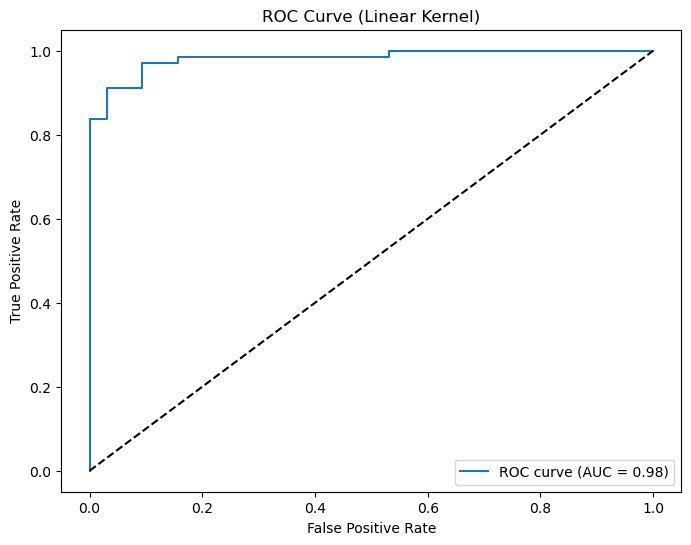

In [8]:
# AUC and ROC (Linear Kernel)
probabilities_linear = linear_svm.predict_proba(X)[:, 1]
auc_linear = roc_auc_score(y, probabilities_linear)
print('AUC (Linear Kernel):', auc_linear)

fpr, tpr, _ = roc_curve(y, probabilities_linear)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_linear:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Linear Kernel)')
plt.legend(loc='lower right')
plt.show()


In [18]:
# RBF Kernel with Grid Search
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Train best RBF SVM Model
best_gamma = grid_search.best_params_['gamma']
print('Best Gamma:', best_gamma)
best_rbf_svm = SVC(kernel='rbf', gamma=best_gamma, probability=True, random_state=42)
best_rbf_svm.fit(X, y)

# Predictions and Accuracy (RBF Kernel)
predictions_rbf = best_rbf_svm.predict(X)
accuracy_rbf = accuracy_score(y, predictions_rbf)
print('Accuracy (RBF Kernel):', accuracy_rbf * 100, '%')

Best Gamma: 0.1
Accuracy (RBF Kernel): 93.0 %


AUC (RBF Kernel): 0.9738051470588235


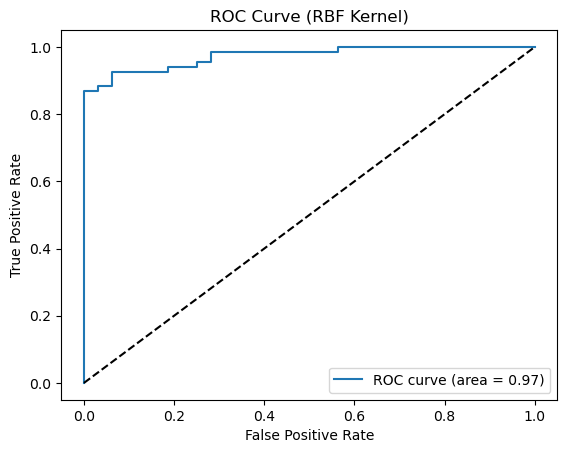

In [21]:
# AUC and ROC (RBF Kernel)
probabilities_rbf = best_rbf_svm.predict_proba(X)[:, 1]
auc_rbf = roc_auc_score(y, probabilities_rbf)
print('AUC (RBF Kernel):', auc_rbf)

fpr, tpr, _ = roc_curve(y, probabilities_rbf)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_rbf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RBF Kernel)')
plt.legend(loc='lower right')
plt.show()
